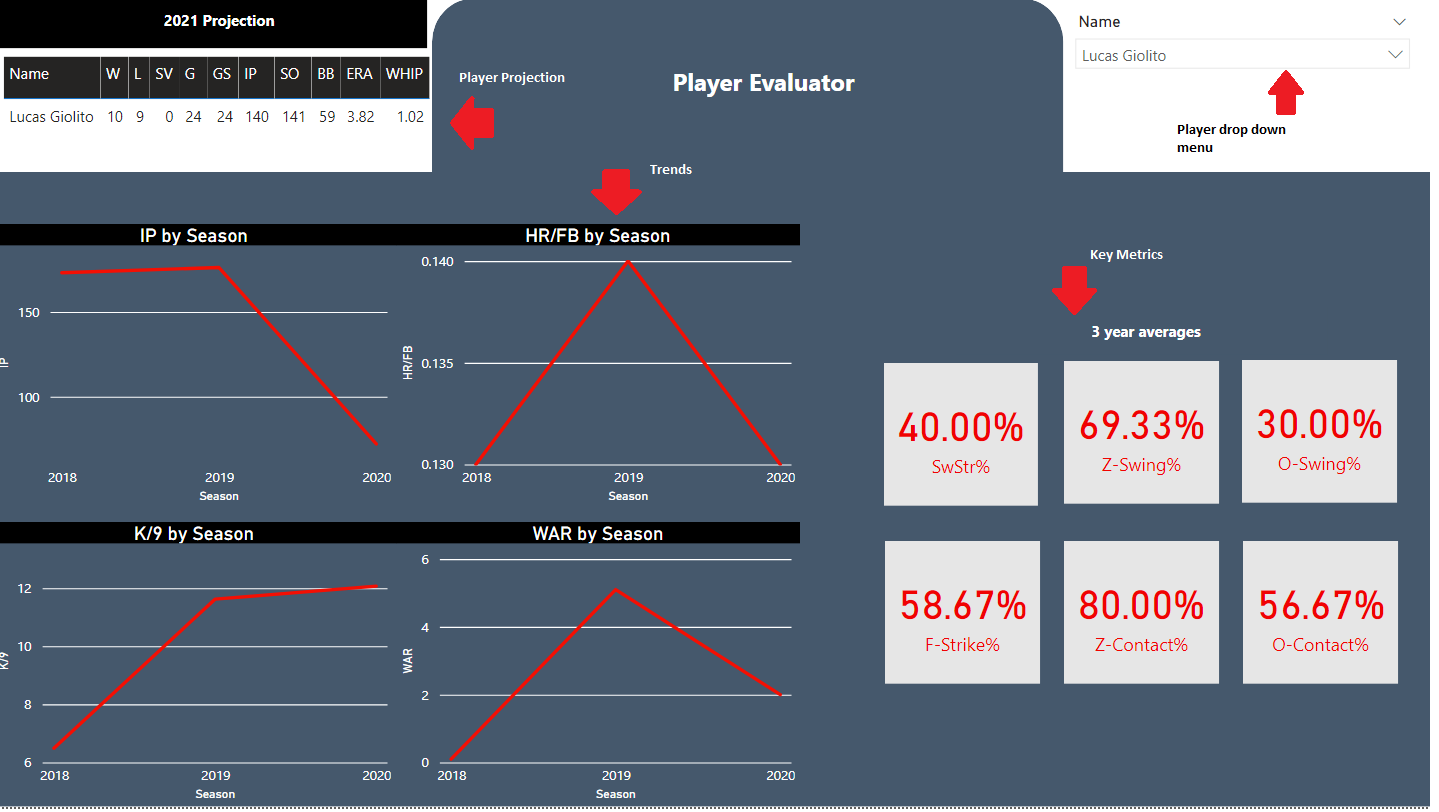

In [89]:
from IPython.display import Image
Image("PitchingDash.PNG")

# Player Analysis / Data Visualization

# Player Tool

In [88]:
player_name = input("Enter player name: ")
plt_df = forcast_data[forcast_data['Name'] == player_name]
projection = player_projection(player_name)
similarity_score = similarity_scores(Pitching_forcasting_grp, player_names ,player_name)
projection_grp = projection.groupby('Name').mean()
similarity_score_grp = similarity_score.groupby('Name').mean()
print("")
print("")
print(player_name, "2021 projection:")
print("")
print(projection_grp)
print("")
print("List of players that are similar to ", player_name)
print("")
print(similarity_score_grp.sort_values('Similiarity_Score')[['Similiarity_Score']].iloc[1:6,0:9])
print("")
print("2021 Projections of similar players")
print("")
print(similarity_score_grp.sort_values('Similiarity_Score').iloc[1:6,0:8])
print("")
print("Three year average for ", player_name)
print("")
print("Wins: ", round(plt_df["W"].mean(),0))
print("ERA: ", round(plt_df["ERA"].mean(),2)) 
print("WHIP: ", round(plt_df["WHIP"].mean(),2)) 
print("SO: ", round(plt_df["SO"].mean(),0)) 
print("SV: ", round(plt_df["SV"].mean(),0))

Enter player name: Lucas Giolito


Lucas Giolito 2021 projection:

                   IP    W    L   SV     G    GS     SO    BB    ERA   WHIP
Name                                                                       
Lucas Giolito  139.72  9.6  8.8  0.0  24.4  24.4  141.2  58.8  3.816  1.016

List of players that are similar to  Lucas Giolito

                Similiarity_Score
Name                             
Kyle Gibson                  0.91
Lance Lynn                   1.04
Luis Castillo                1.24
Reynaldo Lopez               1.25
Julio Teheran                1.29

2021 Projections of similar players

                    IP     W     L   SV     G    GS     SO    BB
Name                                                            
Kyle Gibson     142.48   9.2   8.0  0.0  26.4  24.4  135.6  54.0
Lance Lynn      145.72  10.4   8.4  0.0  25.6  24.8  162.8  54.0
Luis Castillo   143.76  10.0   8.0  0.0  25.2  25.2  156.4  51.2
Reynaldo Lopez  148.88   6.8  10.0  0.0  26.0  26.0

In [5]:
"""The results above show the 2021 projection for Lucas Giolito. Additionally, the result returns a list of 5 players that are most like Lucas Giolito based on the metrics the model was built from: IP, W, L, SV, G, GS, SO, BB, ERA, and WHIP. A similarity score of 0 denotes a player being more like Tim Anderson than a player whose similarity score is closer to 1. In addition, to similarity scores, those players projected stats for the following season is given as well. This can help a user evaluate players and make decisions on who to sign or trade for.""".replace("\n", " ")

'The results above show the 2021 projection for Lucas Giolito. Additionally, the result returns a list of 5 players that are most like Lucas Giolito based on the metrics the model was built from: IP, W, L, SV, G, GS, SO, BB, ERA, and WHIP. A similarity score of 0 denotes a player being more like Tim Anderson than a player whose similarity score is closer to 1. In addition, to similarity scores, those players projected stats for the following season is given as well. This can help a user evaluate players and make decisions on who to sign or trade for.'

# Loading Libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Functions Used

In [31]:
def player_projection(player_name):
    player_projection = Pitching_forcasting[Pitching_forcasting['Name'] == player_name]
    return player_projection

In [64]:
def similarity_scores(players_df_grp, player_names, player_name):
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(players_df_grp)
    
    scaled_data = pd.DataFrame(scaled_data, columns= ['IP','W', 'L', 'SV', 'G', 'GS', 'SO', 'BB', 'ERA', 'WHIP'])
    scaled_data['Name'] = player_names.Name
    
    player = scaled_data[scaled_data['Name'] == player_name]
    
    scaled_data = scaled_data.groupby('Name').sum()
    player = player.groupby('Name').sum()
    
    similiarity_score = distance.cdist(scaled_data, player, 'euclidean')
    
    player_names['Similiarity_Score'] = similiarity_score
    player_names['Similiarity_Score'] = round(player_names['Similiarity_Score'],2)
    
    return player_names

In [65]:
def weighted_seasons(season_df, seaonal_weight):
    weighted_stats = []
    for col_name in fantasy_categories:
        value = season_df[col_name] * seaonal_weight
        weighted_stats.append(value)
    return weighted_stats

# Loading Data

In [66]:
forcast_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Baseball\Pitching\Fangraphs\pitchers_data_2018-2021.csv')
forcast_data.head()

,Season,Name,Team,Age,W,L,ERA,G,GS,CG,...,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,WAR,playerid
0,2019,Matt Moore,DET,30,0,0,0.00,2,2,0,...,0.72,0.51,0.57,0.80,0.72,0.46,0.64,0.15,0.5,1890
1,2020,Jacob Webb,ATL,26,0,0,0.00,8,0,0,...,0.73,0.49,0.65,0.73,0.70,0.39,0.50,0.15,0.1,19274
2,2021,Brad Wieck,CHC,29,0,0,0.00,15,0,0,...,0.58,0.39,0.58,0.83,0.76,0.48,0.59,0.10,0.4,16390
3,2021,Jake Cousins,MIL,26,1,0,0.00,11,0,0,...,0.55,0.43,0.30,0.74,0.49,0.34,0.67,0.22,0.4,21620
4,2020,Devin Williams,MIL,25,4,1,0.33,22,0,0,...,0.60,0.44,0.37,0.64,0.50,0.33,0.59,0.22,1.4,15816


In [67]:
forcast_data['Season'].value_counts()

2019    646
2018    618
2021    545
2020    490
Name: Season, dtype: int64

In [68]:
print("Dataframe Rows: ", forcast_data.shape[0])
print("Dataframe Columns: ", forcast_data.shape[1])

Dataframe Rows:  2299
Dataframe Columns:  52


# Feature Selection

In [69]:
#forcast_data =  forcast_data[['Name','Season','G', 'GS','IP','W', 'L','ERA', 'WHIP','SO', 'SV']]
#forcast_data.head()

# Data Preprocessing

In [70]:
forcast_data = forcast_data[(forcast_data['Season'] >= 2018) & (forcast_data['Season'] <= 2020)]
forcast_data.head()

,Season,Name,Team,Age,W,L,ERA,G,GS,CG,...,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,WAR,playerid
0,2019,Matt Moore,DET,30,0,0,0.00,2,2,0,...,0.72,0.51,0.57,0.80,0.72,0.46,0.64,0.15,0.5,1890
1,2020,Jacob Webb,ATL,26,0,0,0.00,8,0,0,...,0.73,0.49,0.65,0.73,0.70,0.39,0.50,0.15,0.1,19274
4,2020,Devin Williams,MIL,25,4,1,0.33,22,0,0,...,0.60,0.44,0.37,0.64,0.50,0.33,0.59,0.22,1.4,15816
5,2020,Jake Diekman,OAK,33,2,0,0.42,21,0,0,...,0.64,0.44,0.41,0.71,0.61,0.45,0.66,0.18,0.5,5003
6,2019,Brent Suter,MIL,29,4,0,0.49,9,0,0,...,0.74,0.55,0.67,0.79,0.75,0.47,0.71,0.14,0.5,13942


In [71]:
name_df_final = forcast_data['Name'].value_counts().to_frame().reset_index()
name_df_final.columns.values[0] = 'Name'
name_df_final.columns.values[1] = "seasons_of_data"
forcast_data = name_df_final.merge(forcast_data, how = 'inner', on = ['Name'])
forcast_data.head()

,Name,seasons_of_data,Season,Team,Age,W,L,ERA,G,GS,...,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,WAR,playerid
0,Carlos Martinez,3,2018,STL,26,8,6,3.11,33,18,...,0.65,0.47,0.63,0.86,0.78,0.46,0.60,0.10,2.1,11682
1,Carlos Martinez,3,2019,STL,27,4,2,3.17,48,0,...,0.71,0.50,0.59,0.85,0.74,0.41,0.63,0.13,1.2,11682
2,Carlos Martinez,3,2020,STL,28,0,3,9.90,5,5,...,0.68,0.47,0.73,0.90,0.82,0.39,0.64,0.08,-0.2,11682
3,Lucas Sims,3,2020,CIN,26,3,0,2.45,20,0,...,0.55,0.39,0.53,0.79,0.68,0.40,0.52,0.13,0.4,13470
4,Lucas Sims,3,2019,CIN,25,2,1,4.60,24,4,...,0.65,0.47,0.57,0.79,0.68,0.37,0.66,0.15,0.4,13470


In [72]:
forcast_data_grouped = forcast_data.groupby(['Name','Season']).sum()
forcast_data_grouped = forcast_data[forcast_data['seasons_of_data'] >= 3]
forcast_data_grouped = forcast_data_grouped.groupby(['Name','Season']).sum()
forcast_data_grouped.head()

seasons_of_data  Age  W  L   ERA   G  GS  CG  ShO  SV  \
Name        Season                                                          
A.J. Cole   2018                  3   26  4  2  6.14  32   2   0    0   0   
            2019                  3   27  3  1  3.81  25   0   0    0   1   
            2020                  3   28  3  0  3.09  24   0   0    0   1   
A.J. Minter 2018                  3   24  4  3  3.23  65   0   0    0  15   
            2019                  3   25  3  4  7.06  36   0   0    0   5   

                    ...  Z-Swing%  Swing%  O-Contact%  Z-Contact%  Contact%  \
Name        Season  ...                                                       
A.J. Cole   2018    ...      0.63    0.45        0.52        0.81      0.69   
            2019    ...      0.78    0.52        0.62        0.79      0.73   
            2020    ...      0.72    0.48        0.70        0.78      0.74   
A.J. Minter 2018    ...      0.70    0.50        0.54        0.80      0.70   
            2019    ...      0.75    0.50        0.58        0.82      0.72   

                    Zone%  F-Strike%  SwStr%  WAR  playerid  
Name        Season                                           
A.J. Cole   2018     0.41       0.60    0.14 -0.6     11467  
            2019     0.44       0.59    0.14  0.2     11467  
            2020     0.39       0.50    0.12  0.2     11467  
A.J. Minter 2018     0.44       0.59    0.15  1.4     18655  
            2019     0.40       0.54    0.14 -0.1     18655  

[5 rows x 50 columns]

In [73]:
fantasy_cats_restind = forcast_data_grouped.reset_index()

# Forcasting Player Statistics

In [74]:
fantasy_categories = fantasy_cats_restind[['IP','W', 'L', 'SV', 'G', 'GS', 'SO', 'BB', 'ERA', 'WHIP']] 
fantasy_categories.head(3)

,IP,W,L,SV,G,GS,SO,BB,ERA,WHIP
0,48.1,4,2,0,32,2,59,22,6.14,1.59
1,26.0,3,1,1,25,0,30,8,3.81,1.50
2,23.1,3,0,1,24,0,20,9,3.09,1.20


In [75]:
season_2017 = fantasy_cats_restind[fantasy_cats_restind['Season'] == 2017]
season_2018 = fantasy_cats_restind[fantasy_cats_restind['Season'] == 2018]
season_2019 = fantasy_cats_restind[fantasy_cats_restind['Season'] == 2019]

In [76]:
season_2017 = season_2017.groupby(['Name','Season']).mean()
season_2018 = season_2018.groupby(['Name','Season']).mean()
season_2019 = season_2019.groupby(['Name','Season']).mean()

In [77]:
# seasonal weight per season
three_season_2017 = .20
three_season_2018 = .40
three_season_2019 = .40

In [78]:
weighted_stats_2017 = weighted_seasons(season_2017, three_season_2017)
weighted_stats_2018 = weighted_seasons(season_2018, three_season_2018)
weighted_stats_2019 = weighted_seasons(season_2019, three_season_2019)

In [79]:
# tranposing each list below to a seasonal dataframe
forcast_2017 = pd.DataFrame(weighted_stats_2017)
forcast_2017 = forcast_2017.T

In [80]:
forcast_2018 = pd.DataFrame(weighted_stats_2018)
forcast_2018 = forcast_2018.T

In [81]:
forcast_2019 = pd.DataFrame(weighted_stats_2019)
forcast_2019 = forcast_2019.T

In [82]:
# merging each seasonal dataframe into 1 dataframe
dfs  = [forcast_2017,forcast_2018,forcast_2019]
three_seasons_final_forcast = pd.concat(dfs)
three_seasons_final_forcast.reset_index(inplace=True)
three_seasons_final_forcast =  three_seasons_final_forcast.groupby(['Name']).sum()
three_seasons_final_forcast.drop('Season',axis=1,inplace=True)

In [83]:
three_seasons_final_forcast.head(3)

,IP,W,L,SV,G,GS,SO,BB,ERA,WHIP
Name,,,,,,,,,,
A.J. Cole,29.64,2.8,1.2,0.4,22.8,0.8,35.6,12.0,3.980,1.236
A.J. Minter,36.08,2.8,2.8,8.0,40.4,0.0,41.6,18.0,4.116,1.320
Aaron Nola,165.68,11.6,5.2,0.0,26.8,26.8,181.2,55.2,2.496,0.896


# Forcast for 2021 season

In [84]:
Pitching_forcasting = three_seasons_final_forcast.copy().reset_index()
Pitching_forcasting_grp = Pitching_forcasting.groupby('Name').sum()
player_names = Pitching_forcasting.copy()

In [86]:
Pitching_forcasting_CSV = Pitching_forcasting.to_csv(index=False)
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='Pitching_forcasting_CSV.csv')  
Pitching_forcasting.to_csv('PitcherForcasting.zip', index=False, compression = compression_opts)

In [87]:
forcast_data_CSV = forcast_data.to_csv(index=False)
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='forcast_data_pitching.csv')  
forcast_data.to_csv('Forcasting_pitching.zip', index=False, compression = compression_opts)